In [13]:
import torch
import numpy as np

(1) Pytorch Session 1

Ex1. You are given

$$
(X_1, \cdots, X_5)=(1,\, 0,\, 0,\, 1,\, 1)
$$

and

$$X_i\sim {\rm Ber}(p).$$

In [24]:
X = torch.tensor([1,0,0,1,1], dtype=torch.float32)

1. Write the (negative) log-likelihood function $\ell(p)$ as a function of $X$ and $p$. Here, $p$ is a implicit input of $\ell$.

2.  Find the maximum likelihood estimator of $p$ by torch.

In [27]:
p = torch.tensor(torch.rand([1]), requires_grad=True)

def n_log_lik(x):
  n_lik = - torch.mean(x * torch.log(p) + (1-x)*torch.log(1-p))
  return n_lik

C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\2847331409.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p = torch.tensor(torch.rand([1]), requires_grad=True)


In [29]:
history = []
lr = 0.01
epochs= 100

optimizer = torch.optim.SGD([p], lr=lr)

for i in range(epochs):
    loss = n_log_lik(X)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    history.append(loss.item())

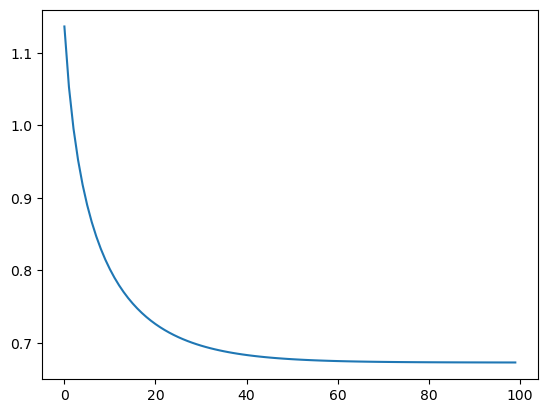

In [31]:
import matplotlib.pyplot as plt
plt.plot(history)

In [35]:
p.data

tensor([0.5942])

In the above optimization, it is important to guarantee that $p\in(0,1)$. To do this, we use logistic function

$$f(x)=\frac{1}{1+e^{-x}}\quad \hbox{for}\quad x\in(-\infty, \infty).$$

C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\2625306532.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q = torch.tensor(torch.randn([1]), requires_grad=True)


tensor([0.6000], grad_fn=<MulBackward0>)

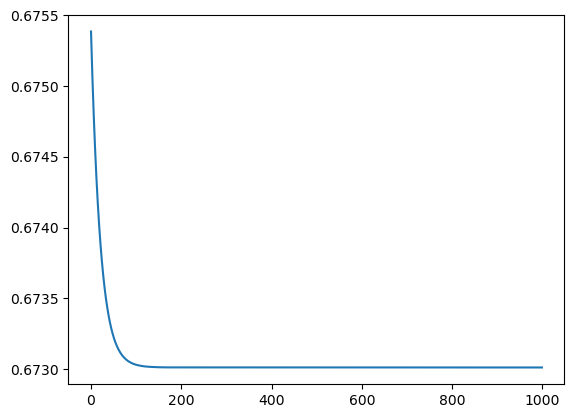

In [63]:
q = torch.tensor(torch.randn([1]), requires_grad=True)

def logistic(x):
    return 1/(1+torch.exp(-x))      # logistic 

def n_log_lik(x):
    p = logistic(q)   # 추출된 q를 logistic 씌워
    n_lik = -torch.mean(x * torch.log(p) + (1-x) * torch.log(1-p))
    return n_lik

history=[]
lr = 0.1
epochs=1000
optimizer = torch.optim.SGD([q], lr=lr)

for i in range(epochs):
    loss = n_log_lik(X)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    history.append(loss.item())

plt.plot(history)
logistic(q)

Ex2. Bernoulli

```
def n_log_lik(x):
  p = logistic(b)
  m = torch.distributions.bernoulli.Bernoulli(p)
  n_lik = m.xxxxxxxxx
  return n_lik
```

C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\3782419179.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q = torch.tensor(torch.randn([1]), requires_grad=True)


tensor([0.6000], grad_fn=<MulBackward0>)

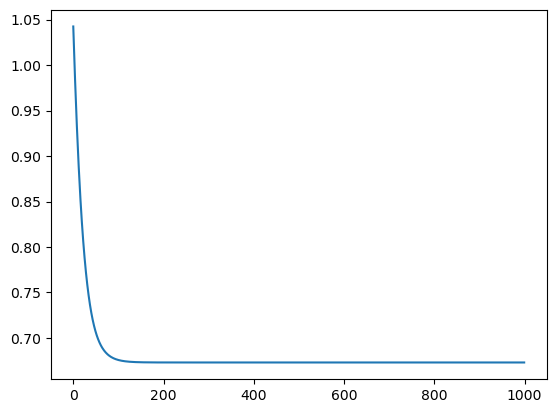

In [61]:
q = torch.tensor(torch.randn([1]), requires_grad=True)

def logistic(x):
    return 1/(1+torch.exp(-x))

def n_log_lik(x):
    p = logistic(q)
    m = torch.distributions.bernoulli.Bernoulli(p)
    n_lik = -torch.mean(m.log_prob(x))
    return n_lik

history=[]
lr=0.1
epochs=1000
optimizer = torch.optim.SGD([q], lr=lr)

for i in range(epochs):
    loss = n_log_lik(X)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    history.append(loss.item())

plt.plot(history)
logistic(q)

Ex3. Exponential

$$
(X_1, \cdots, X_5)=(10.3,\, 19.7,\, 15.4,\, 29.6,\, 20)
$$

and

$$X_i\sim {\rm Exp}(mean=\theta).$$

Estimate $\theta\in(0, \infty)$.

C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\2455457462.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q = torch.tensor(torch.randn([1]), requires_grad = True)


tensor([19.0000], grad_fn=<ExpBackward0>)

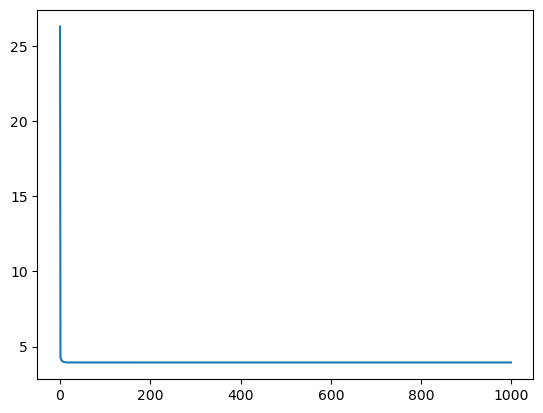

In [85]:
X = torch.tensor([10.3,19.7,15.4,29.6,20], dtype=torch.float32)
q = torch.tensor(torch.randn([1]), requires_grad = True)

def n_log_lik(x):
    theta = torch.exp(q)  # 범위가 0보다 큰 것으로 제한되어있기 때문에 !!
    m = torch.distributions.exponential.Exponential(1/theta)
    n_lik = -torch.mean(m.log_prob(x))
    return n_lik

history=[]
lr = 0.1
epochs=1000
optimizer = torch.optim.SGD([q], lr=lr)

for i in range(epochs):
    loss = n_log_lik(X)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    history.append(loss.item())

plt.plot(history)
torch.exp(q)

Ex4. Poisson

$$
(X_1, \cdots, X_5)=(3,\, 1,\, 0,\, 2,\, 1)
$$

and

$$X_i\sim {\rm Pois}(mean=\lambda).$$

Estimate $\lambda\in(0, \infty)$.

C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\327378384.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(torch.randn([1]), requires_grad=True)


tensor([1.4000], grad_fn=<ExpBackward0>)

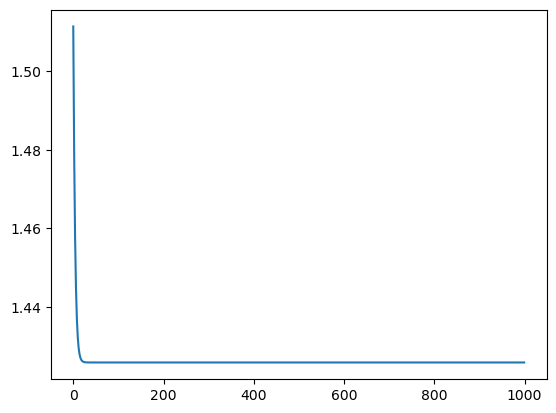

In [87]:
X = torch.tensor([3,1,0,2,1], dtype=torch.float32)
b = torch.tensor(torch.randn([1]), requires_grad=True)

def n_log_lik(x):
    p = torch.exp(b)
    m = torch.distributions.poisson.Poisson(p)
    n_lik = -torch.mean(m.log_prob(x))
    return n_lik

history =[]
lr=0.1
epochs =1000
optimizer = torch.optim.SGD([b], lr=lr)

for i in range(epochs):
    loss = n_log_lik(X)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    history.append(loss.item())

plt.plot(history)
torch.exp(b)

Ex5. Normal

You are given

$$
(X_1, \cdots, X_{20})=(-0.08,2.04,4.47,0.13,2.01,4.39,2.07,-5.06,-0.02,1.60
,-0.76,0.06,3.70,3.08,4.69,2.11,0.01,0.11,-0.11,3.97)
$$

and

$$X_i\sim {\rm N}(\mu, \sigma^2).$$

Estimate $\lambda\in(-\infty, \infty)$ and $\sigma\in(0, \infty)$.

C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\142466874.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q = torch.tensor(torch.randn([2]), requires_grad=True)


tensor(1.4205) tensor(2.2974)


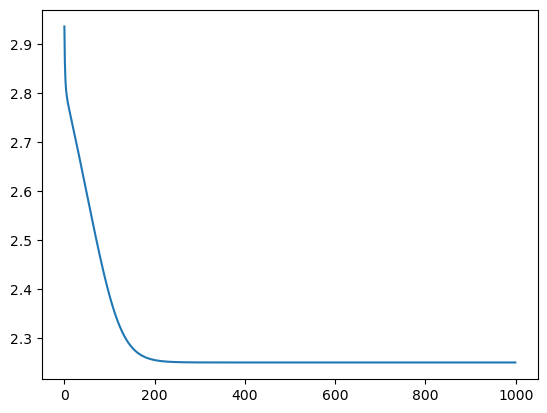

In [93]:
X = torch.tensor([-0.08,2.04,4.47,0.13,2.01,4.39,2.07,-5.06,-0.02,1.60,-0.76,0.06,3.70,3.08,4.69,2.11,0.01,0.11,-0.11,3.97], dtype=torch.float32)
q = torch.tensor(torch.randn([2]), requires_grad=True)

def n_log_lik(x):
    mu = q[0]
    sd = torch.exp(q[1])
    m = torch.distributions.normal.Normal(mu,sd)
    n_lik = -torch.mean(m.log_prob(x))
    return n_lik

history=[]
lr=0.1
epochs=1000
optimizer = torch.optim.SGD([q], lr=lr)

for i in range(epochs):
    loss = n_log_lik(X)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    history.append(loss.item())

plt.plot(history)
print(q.data[0], torch.exp(q.data[1]))

(2) Pytorch Session 2

Ex6. You are given

$$
(X_1, \cdots, X_{10})=(-0.86,-0.42,-0.22,0.03,0.15,0.48,0.79,1.11,1.50,1.89)
$$


$$
(Y_1, \cdots, Y_{10})=(2.61,1.51,1.28,0.57,0.18,-0.46,-1.14,-1.61,-2.73,-3.72)
$$

and

$$
Y_i \sim N(\beta_0 + \beta_1 X_i, \sigma^2)
$$

Estimate $\beta_0, \beta_1\in(-\infty, \infty)$ and $\sigma\in(0, \infty)$.

Estimate

1. $\beta_0$, $\beta_1$, and $\sigma^2$.

2. Repeat the estimation of $\beta_0$ and $\beta_1$ using sklearn package.

C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\1969092817.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  betas = torch.tensor(torch.randn([2]), requires_grad= True)
C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\1969092817.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q = torch.tensor(torch.randn([1]), requires_grad=True)


tensor([ 0.6520, -2.2539], requires_grad=True)

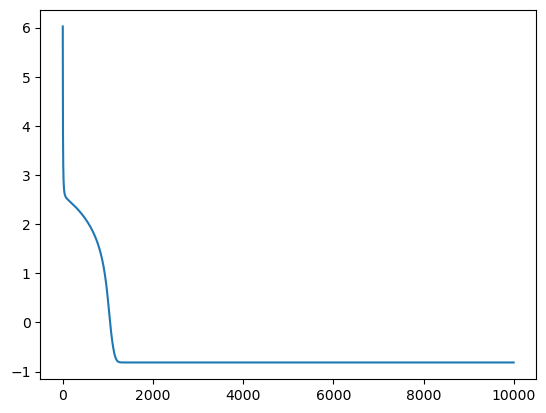

In [126]:
X = torch.tensor([-0.86,-0.42,-0.22,0.03,0.15,0.48,0.79,1.11,1.50,1.89])
Y = torch.tensor([2.61,1.51,1.28,0.57,0.18,-0.46,-1.14,-1.61,-2.73,-3.72])
betas = torch.tensor(torch.randn([2]), requires_grad= True)
q = torch.tensor(torch.randn([1]), requires_grad=True)

def forward(x):
    yhat = betas[0] + betas[1]*x
    return yhat

def n_log_lik(x,y):
    uhat = forward(x)
    sd = torch.exp(q)
    m = torch.distributions.normal.Normal(uhat, sd)
    n_lik = -torch.mean(m.log_prob(y))
    return n_lik

history=[]
lr=0.01
epochs=10000
optimizer = torch.optim.SGD([betas, q], lr=lr)

for i in range(epochs):
    loss = n_log_lik(X, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    history.append(loss.item())

plt.plot(history)
betas

C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\368695725.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  betas = torch.tensor(torch.randn([2]), requires_grad= True)
C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\368695725.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q = torch.tensor(torch.randn([1]), requires_grad=True)


tensor([ 0.6520, -2.2539], requires_grad=True)

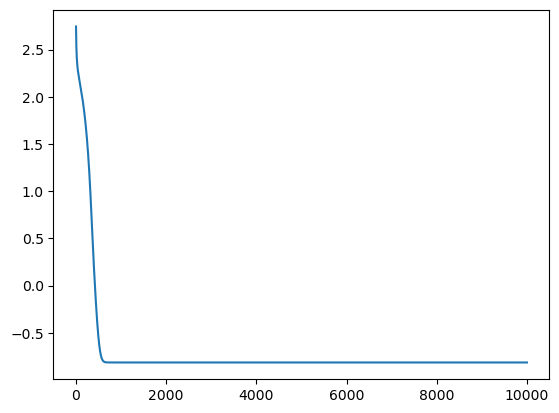

In [132]:
X = torch.tensor([-0.86,-0.42,-0.22,0.03,0.15,0.48,0.79,1.11,1.50,1.89])
Y = torch.tensor([2.61,1.51,1.28,0.57,0.18,-0.46,-1.14,-1.61,-2.73,-3.72])
betas = torch.tensor(torch.randn([2]), requires_grad= True)
q = torch.tensor(torch.randn([1]), requires_grad=True)

def forward(x):
    yhat = betas[0] + betas[1]*x
    return yhat

def loss_ftn(yhat, y):
    sd = torch.exp(q)
    m = torch.distributions.normal.Normal(yhat, sd)
    n_lik = -torch.mean(m.log_prob(y))
    return n_lik

history=[]
lr=0.01
epochs=10000
optimizer = torch.optim.SGD([betas, q], lr=lr)

for i in range(epochs):
    yhat = forward(X)
    loss = loss_ftn(yhat, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    history.append(loss.item())

plt.plot(history)
betas

Ex7. Multiple Linear Regression

X1: horsepower

X2: cylinders

Y: mpg

Model:

$$Y_i \sim N(\beta_0+\beta_1X_1 + \beta_2 X_2, \sigma^2)$$

Answer the following questions.

i. Define a (standardized) design matrix `X` of shape `[n,3]`.

ii. Using `X`, use MLE to estimate $\beta_0, \cdots, \beta_2$ and $\sigma^2$.

iii. Compare your estimation with sklearn.

In [136]:
!pip install ISLP

In [140]:
import ISLP
import numpy as np
import torch

In [141]:
Auto = ISLP.load_data("Auto")

X1 = torch.tensor(Auto["horsepower"], dtype=torch.float32).reshape([-1,1])
X2 = torch.tensor(Auto["cylinders"], dtype=torch.float32).reshape([-1,1])
Y = torch.tensor(Auto["mpg"], dtype=torch.float32).reshape([-1,1])
X= torch.concat([X1, X2], axis=1)
print(X.shape)

torch.Size([392, 2])


C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\3984617064.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X1 = torch.tensor(Auto["horsepower"], dtype=torch.float32).reshape([-1,1])
C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\3984617064.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X2 = torch.tensor(Auto["cylinders"], dtype=torch.float32).reshape([-1,1])
C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\3984617064.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

In [144]:
# 1) split data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [150]:
# 2) standardize
ux = torch.mean(X_train, axis=0)
stdx = torch.std(X_train, axis=0)
X_train = (X_train - ux) / stdx
print(X_train.shape)

X_test = (X_test - ux) / stdx
print(X_test.shape)

torch.Size([313, 2])
torch.Size([79, 2])


In [160]:
# 3) prepare batch learning
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)
train_loader = DataLoader(dataset = train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset = test_dataset, batch_size=32, shuffle=False) # test는 shuffle x!!!

C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\602932228.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  betas = torch.tensor(torch.randn([2,1]), requires_grad=True)
C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\602932228.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bias = torch.tensor(torch.randn([1]), requires_grad=True)
C:\Users\annyu\AppData\Local\Temp\ipykernel_18352\602932228.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q = torch.tensor(torch.randn([1]), requires_grad = True)


tensor([3.6607], requires_grad=True) tensor([[-1.1785],
        [-0.6682]], requires_grad=True) tensor([21.0372], grad_fn=<ExpBackward0>)


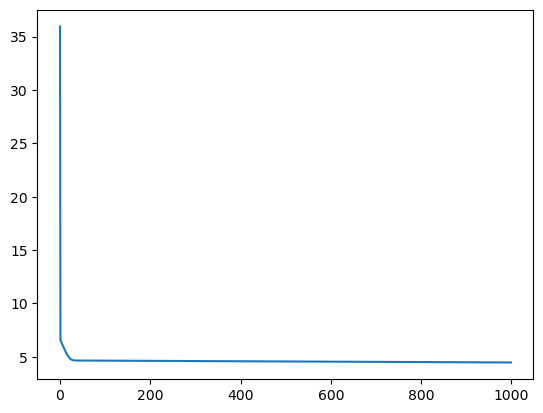

In [175]:
# 4) training
betas = torch.tensor(torch.randn([2,1]), requires_grad=True)
bias = torch.tensor(torch.randn([1]), requires_grad=True)
q = torch.tensor(torch.randn([1]), requires_grad = True)

def forward(x):
    yhat = bias + x @ betas  # [32,2] * [2,1] = [32,1]
    return yhat

def loss_ftn(x,y):
    mean = forward(x)
    sd = torch.exp(q)
    m = torch.distributions.normal.Normal(mean, sd)
    n_lik = -torch.mean(m.log_prob(y))
    return n_lik

history=[]
lr=0.01
epochs=1000
optimizer = torch.optim.SGD([betas, bias, q], lr=lr)
n = len(train_loader.dataset)

for i in range(epochs):
    LOSS = 0
    for xx, yy in train_loader:
        loss = loss_ftn(xx, yy)
        LOSS += loss * len(yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    history.append(LOSS.item()/n)

plt.plot(history)
print(bias,betas, torch.exp(q))

In [177]:
# Test MSE
MSE_LOSS = 0
n_test = len(test_loader.dataset)
for xx, yy in test_loader:
  yhat = forward(xx)
  mse_loss = torch.sum((yy-yhat)**2)
  MSE_LOSS += mse_loss

print(MSE_LOSS / n_test)

tensor(399.7397, grad_fn=<DivBackward0>)
